<a href="https://colab.research.google.com/github/souldrive7/ECP/blob/main/pc_example_gitUD_kadai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習課題
## 1. a.
実データセットを一つ選んで、PCアルゴリズムを適用し、因果グラフのプロットを出力せよ。ただし、以下の条件を満たすこと：
- 独立検定の有意水準を **0.1** に設定する。  
- 実データの出典も明記する。  
- 相関係数に基づく検定を使う場合、変数集合の中に**離散変数とカテゴリカル変数を取り除く**こと。  
- 結果の因果グラフにおいて、**4つ以上のノードを含む**ようにすること。

## 1. b.

上記のデータを用いて：
- 一つの変数を**介入変数**、一つの変数を**目的変数**として選び、  
- **直接因果効果の推定値**を求めよ。  
- その際に使用した**調整変数**を明記すること。

## 2.
FCI の出力が以下のグラフになると仮定する：

- データの経験分布が忠実であると仮定する。  
- FCI の全ての条件付き独立検定が正しい結果を返すと仮定する。  
- このとき、**X₁ と X₂ の間に未観測の交絡変数が存在しないことを証明せよ。**

In [8]:
X１とX3がd分離できる関数が存在します。
X2とX1の間に
ヒント、X1とX3がつながっていないことが重要。d-分離できる変数が存在する。
X1とX2、未観測の交絡変数があるとどのような矛盾が生じるか考える



SyntaxError: invalid character '。' (U+3002) (<ipython-input-8-fee8b68faa39>, line 1)

In [1]:
!pip install git+https://github.com/py-why/causal-learn.git


  Cloning https://github.com/py-why/causal-learn.git to /tmp/pip-req-build-smfbedrn
  Running command git clone --filter=blob:none --quiet https://github.com/py-why/causal-learn.git /tmp/pip-req-build-smfbedrn
  Resolved https://github.com/py-why/causal-learn.git to commit 9689c1bdc468847729eacf0921b76f598161ae16
  Preparing metadata (setup.py) ... done
  Created wheel for causal-learn: filename=causal_learn-0.1.4.0-py3-none-any.whl size=242175 sha256=d3374e8d652db10d8a9c4dd5ba4786fd028aca2ad12fd5dbc3e5fbee6581efb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-p3tppt1t/wheels/87/81/9d/85f7f57f5fcf97732e3f93b20dcb7328d890464ff5263d9c62
Successfully built causal-learn


In [2]:
import numpy as np
from causallearn.search.ConstraintBased.PC import pc

In [3]:
from causallearn.utils.Dataset import load_dataset

data_sachs, labels = load_dataset("sachs")

print(data_sachs.shape)
print(labels)

(7466, 11)
['raf', 'mek', 'plc', 'pip2', 'pip3', 'erk', 'akt', 'pka', 'pkc', 'p38', 'jnk']


In [4]:
data_sachs

array([[2.640e+01, 1.320e+01, 8.820e+00, ..., 1.700e+01, 4.490e+01,
        4.000e+01],
       [3.590e+01, 1.650e+01, 1.230e+01, ..., 3.370e+00, 1.650e+01,
        6.150e+01],
       [5.940e+01, 4.410e+01, 1.460e+01, ..., 1.140e+01, 3.190e+01,
        1.950e+01],
       ...,
       [2.810e+01, 4.490e+00, 1.880e+01, ..., 1.000e+00, 1.750e+00,
        2.000e+00],
       [3.460e+01, 7.100e+00, 5.730e+00, ..., 4.450e+01, 1.382e+03,
        2.440e+00],
       [3.050e+01, 1.010e+00, 7.300e+00, ..., 1.000e+00, 1.000e+00,
        1.650e+00]])

デフォルトの条件付き独立検定はFisherのz検定。こ
の検定は線形ガウスモデルを仮定する。

In [5]:
cg = pc(data_sachs,alpha = 0.2)

  0%|          | 0/11 [00:00<?, ?it/s]

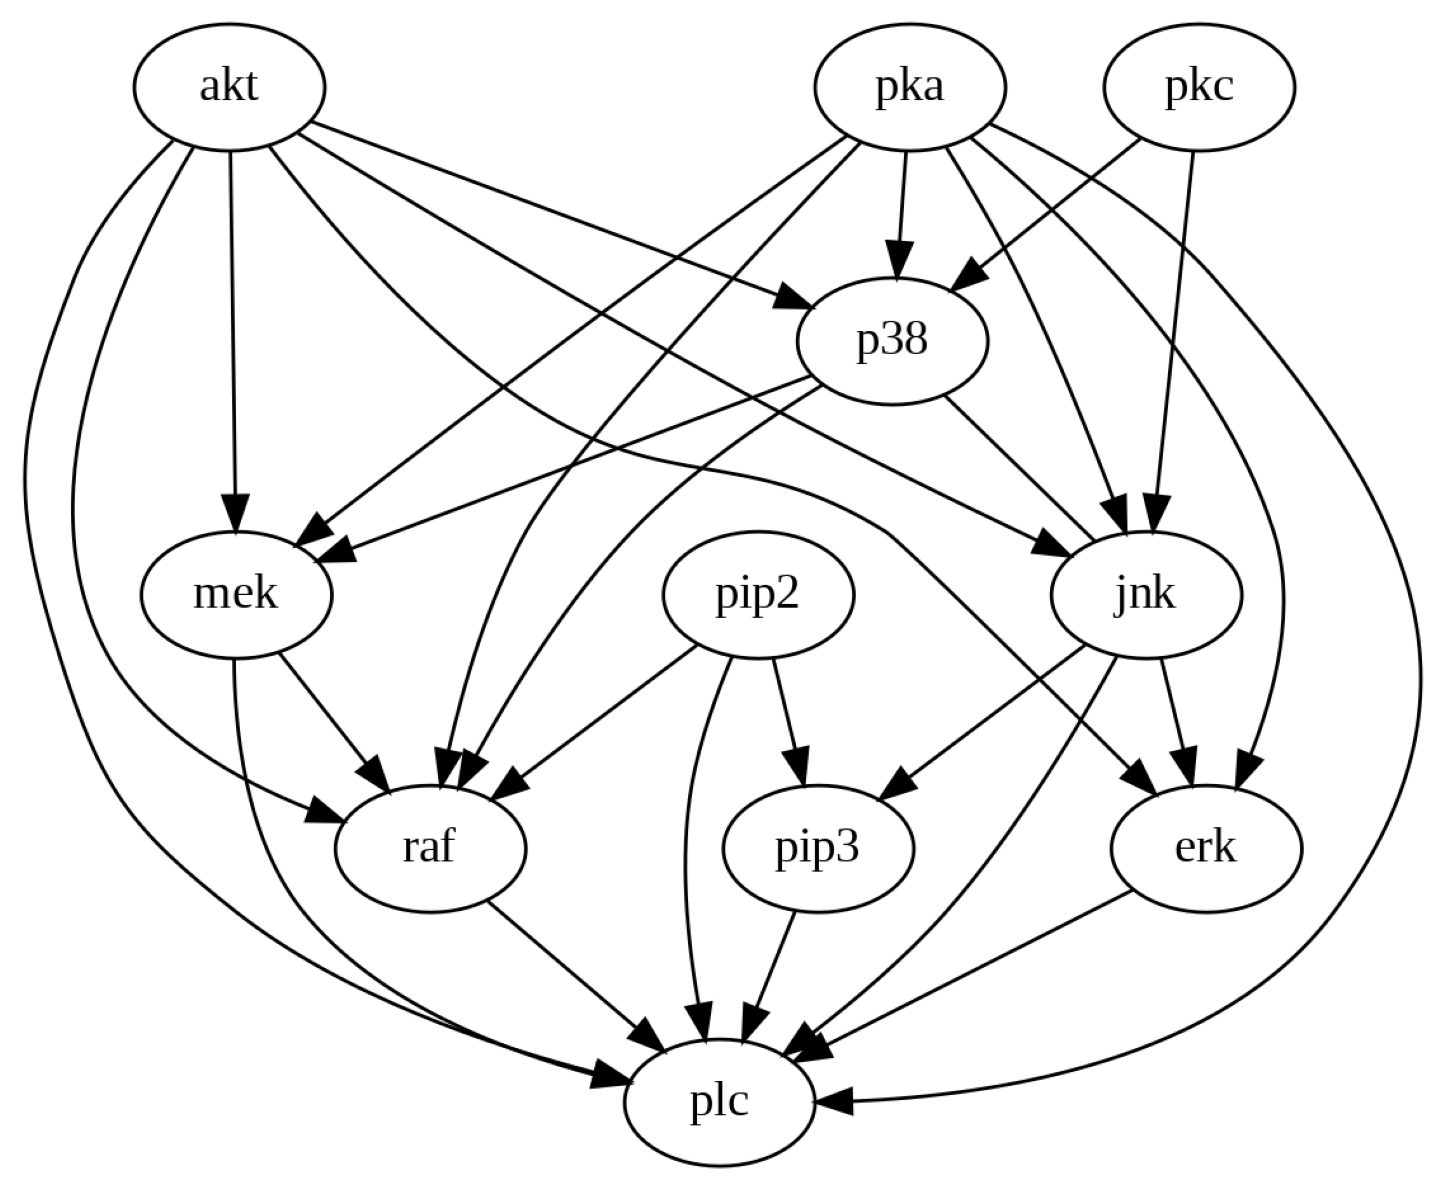

In [6]:
cg.draw_pydot_graph(labels=labels)
#cg.draw_pydot_graph()

In [7]:
cg.G.graph

array([[ 0,  1, -1,  1,  0,  0,  1,  1,  0,  1,  0],
       [-1,  0, -1,  0,  0,  0,  1,  1,  0,  1,  0],
       [ 1,  1,  0,  1,  1,  1,  1,  1,  0,  0,  1],
       [-1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, -1,  0,  0,  0,  1,  1,  0,  0,  1],
       [-1, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1],
       [-1, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1],
       [-1, -1,  0,  0,  0,  0,  1,  1,  1,  0, -1],
       [ 0,  0, -1,  0, -1, -1,  1,  1,  1, -1,  0]])

真のグラフと比べると、因果順序が逆になったところが多かった。未観測変数のせいかもしれません。

# 演習課題：PCアルゴリズムと因果推論の実践

## 1. PCアルゴリズムによる因果構造の推定

**目的**：実データセットを用いて、PCアルゴリズムを適用し、因果グラフを出力する。

- 有意水準：0.1
- 検定方法：相関係数に基づく Fisher's Z 検定
- 離散変数・カテゴリカル変数は除外
- ノード数：4以上
- データ出典：UCI Machine Learning Repository – Auto MPG Dataset
---

## 2. 直接因果効果の推定

**介入変数**：`weight`（車両重量）  
**目的変数**：`mpg`（燃費）  
**調整変数**：`horsepower`, `displacement`

**目的**：車両重量が燃費に与える直接因果効果を回帰分析により推定する。

## 3. FCI出力に基づく未観測交絡因子の不存在の証明（理論）

**前提条件**：
- 経験分布は忠実性を満たしている
- FCIアルゴリズムのすべての独立性検定は正確である

**主張**：FCIの出力グラフにおいて、$X_1$ と $X_2$ の間に \( X_1 \leftrightarrow X_2 \)（双方向矢印）が存在しないならば、$X_1$ と $X_2$ の間には未観測の交絡因子は存在しない。

**証明の概略**：
- FCIは未観測の交絡因子がある場合、双方向矢印（\( \leftrightarrow \)）を出力する。
- 双方向矢印が存在しないとは、$X_1$ と $X_2$ の依存関係が観測された変数群の条件付けによって説明可能であるという意味である。
- よって、未観測の変数による共通原因の存在は否定される。

**結論**：FCI出力に双方向矢印がなければ、未観測交絡因子は存在しない。

---

**参考文献**：
- UCI Machine Learning Repository: Auto MPG Dataset
- Spirtes, Glymour, Scheines (2000), "Causation, Prediction, and Search"
- Zhang et al. (2012), "On the Completeness of Orientation Rules for Causal Discovery in the Presence of Latent Confounders"


<ipython-input-9-7979b74a238f>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names, na_values='?')


  0%|          | 0/5 [00:00<?, ?it/s]

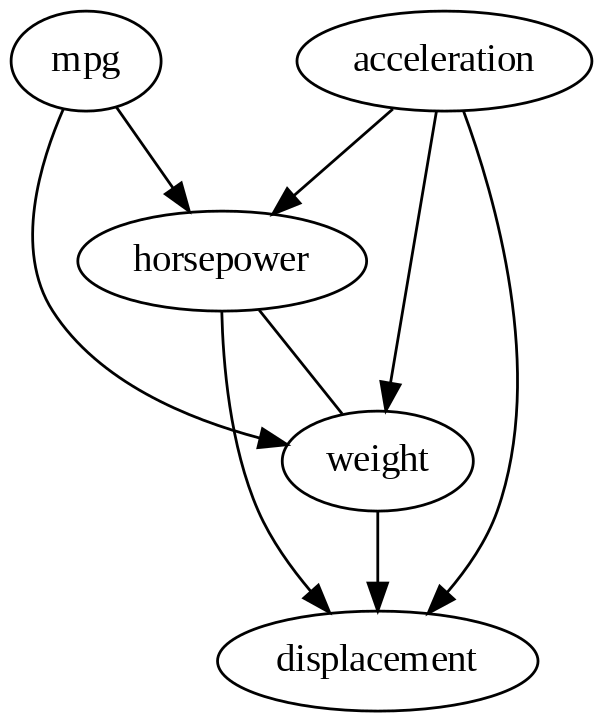


[回帰結果要約]
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     312.0
Date:                Fri, 09 May 2025   Prob (F-statistic):          5.10e-103
Time:                        03:08:00   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.8559      1.196    

In [9]:
# PCアルゴリズムと因果効果推定のNotebook

# セットアップ
import pandas as pd
import numpy as np
import statsmodels.api as sm
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from IPython.display import Image, display
import matplotlib.pyplot as plt

# データ読み込みと前処理
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
data = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names, na_values='?')
data.dropna(inplace=True)
data = data.drop(['cylinders','model_year','origin','car_name'], axis=1)  # 離散変数除外

# PCアルゴリズムの適用
cg = pc(data.to_numpy(), alpha=0.1, indep_test='fisherz')

# グラフの描画と保存
pyd = GraphUtils.to_pydot(cg.G, labels=list(data.columns))
pyd.write_png('causal_graph.png')
display(Image(filename='causal_graph.png'))

# 回帰による直接因果効果推定
Y = data['mpg']
X = data[['weight', 'horsepower', 'displacement']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("\n[回帰結果要約]")
print(model.summary())

# 回帰係数の抽出と解釈
coef = model.params['weight']
print("\n[直接因果効果の推定値]")
print(f"車両重量（weight）の燃費（mpg）への直接因果効果: {coef:.4f} mpg / lb")

# 補足：FCIにおける交絡の理論説明（テキストセルとして別途記述）


SyntaxError: invalid character '：' (U+FF1A) (<ipython-input-12-358171ea9239>, line 5)